==========  [AI in Finance Research](https://aiinfinancegroup.github.io/) ==== @ Makerere University, Kampala Uganda ===== 2022 ======

# Machine learning models for generating tabular financial datasets

This is an example notebook for generating tabular financial datasets. Models covered can be used to generate more data. 

GaussianCopula
-----------------------

The `sdv.tabular.GaussianCopula` model is based on [copula
funtions](https://en.wikipedia.org/wiki/Copula_%28probability_theory%29).

In mathematical terms, a *copula* is a distribution over the unit cube
${\displaystyle [0,1]^{d}}$ which is constructed from a multivariate
normal distribution over ${\displaystyle \mathbb {R} ^{d}}$ by using the
probability integral transform. Intuitively, a *copula* is a
mathematical function that allows us to describe the joint distribution
of multiple random variables by analyzing the dependencies between their
marginal distributions.

Let\'s now discover how to learn a dataset and later on generate
synthetic data with the same format and statistical properties by using
the `GaussianCopula` model.

In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns

#### Original Exchange rate data

In [20]:
import pandas as pd

data = pd.read_csv("exchange_rate.csv")

In [23]:
data.head()

,ETB,EUR,GBP,KES,TZS,USD
0,0.38982,20.22033,23.13601,0.17103,0.00883,20.59097
1,0.38972,20.50827,23.40862,0.17075,0.00883,20.58443
2,0.38961,20.62482,23.51596,0.17077,0.00883,20.57750
3,0.38951,20.56253,23.45787,0.17086,0.00883,20.57076
4,0.38939,20.54101,23.56387,0.17080,0.00882,20.56363


#### Descriptive Statistics for the original data

In [28]:
data.describe()

,ETB,EUR,GBP,KES,TZS,USD
count,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000
mean,0.599300,18.370404,21.817930,0.156938,0.007551,15.711736
std,0.097720,3.139308,3.220150,0.019408,0.000720,3.205013
min,0.020400,0.136030,0.272050,0.013600,0.002720,9.665290
25%,0.555280,16.408885,20.750000,0.148055,0.007105,13.557710
50%,0.615860,18.324110,22.116320,0.158670,0.007550,16.387420
75%,0.683085,20.347835,23.454405,0.173815,0.008060,18.299850
max,0.725030,23.880040,27.744220,0.182730,0.008830,26.285290


#### Creating an instance of the model, fit and sample data

In [29]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(data)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [30]:
new_data = model.sample(num_rows= len(data))

In [31]:
new_data.head()

,ETB,EUR,GBP,KES,TZS,USD
0,0.43352,14.16851,20.64207,0.12661,0.00764,12.59783
1,0.69519,13.13013,21.24150,0.13999,0.00695,13.29897
2,0.59464,17.38759,20.43572,0.14925,0.00709,15.02830
3,0.64658,21.95893,22.72062,0.16894,0.00795,17.86521
4,0.65105,20.08685,24.67927,0.17465,0.00797,20.00641


#### Correlations

In [32]:
from scipy import stats

In [33]:
cormat_real = data.corr()
round(cormat_real,4)

,ETB,EUR,GBP,KES,TZS,USD
ETB,1.0000,-0.4394,-0.3906,-0.3032,-0.4534,-0.4186
EUR,-0.4394,1.0000,0.9235,0.9358,0.8331,0.9328
GBP,-0.3906,0.9235,1.0000,0.9015,0.8164,0.8962
KES,-0.3032,0.9358,0.9015,1.0000,0.8110,0.9438
TZS,-0.4534,0.8331,0.8164,0.8110,1.0000,0.7627
USD,-0.4186,0.9328,0.8962,0.9438,0.7627,1.0000


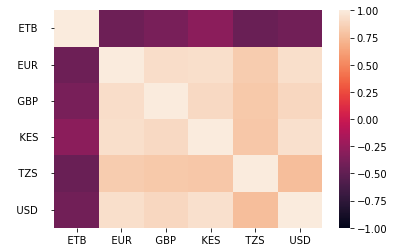

In [34]:
sns.heatmap(cormat_real, vmin = -1.0, vmax=1.0);

In [35]:
cormat_GCopula = new_data.corr()
round(cormat_GCopula,4)

,ETB,EUR,GBP,KES,TZS,USD
ETB,1.0000,-0.4214,-0.3993,-0.3283,-0.3909,-0.3415
EUR,-0.4214,1.0000,0.8989,0.9041,0.8206,0.8979
GBP,-0.3993,0.8989,1.0000,0.8468,0.7961,0.8574
KES,-0.3283,0.9041,0.8468,1.0000,0.7831,0.8960
TZS,-0.3909,0.8206,0.7961,0.7831,1.0000,0.7725
USD,-0.3415,0.8979,0.8574,0.8960,0.7725,1.0000


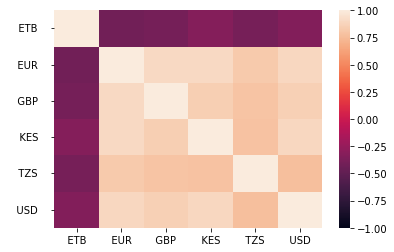

In [36]:
sns.heatmap(cormat_GCopula, vmin = -1.0, vmax=1.0);

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
ETB_original = data.iloc[:,[0]]
ETB_synthetic = new_data.iloc[:,[0]]
EUR_original = data.iloc[:,[1]]
EUR_synthetic = new_data.iloc[:,[1]]
GBP_original = data.iloc[:,[2]]
GBP_synthetic = new_data.iloc[:,[2]]
KES_original = data.iloc[:,[3]]
KES_synthetic = new_data.iloc[:,[3]]
TZS_original = data.iloc[:,[4]]
TZS_synthetic = new_data.iloc[:,[4]]
USD_original = data.iloc[:,[5]]
USD_synthetic = new_data.iloc[:,[5]]

#### Distribution of currency returns

In [40]:
import matplotlib.pyplot as plt
import numpy as np

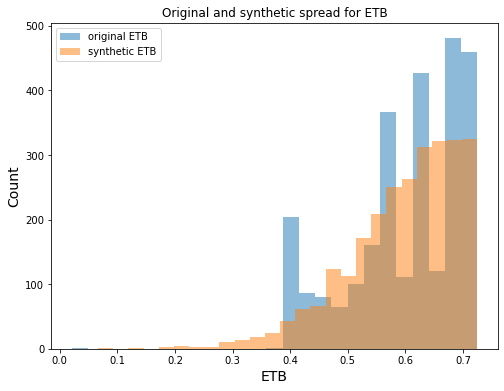

In [41]:
plt.figure(figsize=(8,6))
plt.hist(ETB_original, bins=25, alpha=0.5, label="original ETB")
plt.hist(ETB_synthetic, bins=25, alpha=0.5, label="synthetic ETB")
plt.xlabel("ETB", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for ETB")
plt.legend(loc='upper left')
plt.savefig("Gauss_ETB.png")
plt.show()

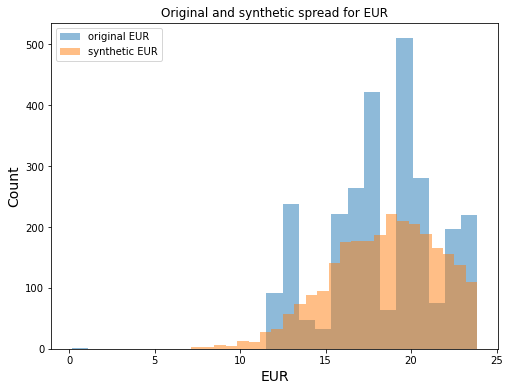

In [42]:
plt.figure(figsize=(8,6))
plt.hist(EUR_original, bins=25, alpha=0.5, label="original EUR")
plt.hist(EUR_synthetic, bins=25, alpha=0.5, label="synthetic EUR")
plt.xlabel("EUR", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for EUR")
plt.savefig("Gauss_EUR.png")
plt.legend(loc='upper left')
plt.show()

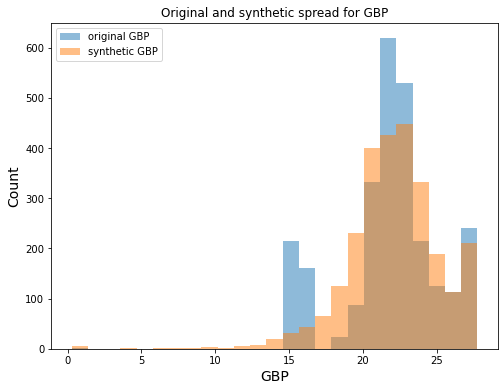

In [43]:
plt.figure(figsize=(8,6))
plt.hist(GBP_original, bins=25, alpha=0.5, label="original GBP")
plt.hist(GBP_synthetic, bins=25, alpha=0.5, label="synthetic GBP")
plt.xlabel("GBP", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for GBP")
plt.savefig("Gauss_GBP.png")
plt.legend(loc='upper left')
plt.show()

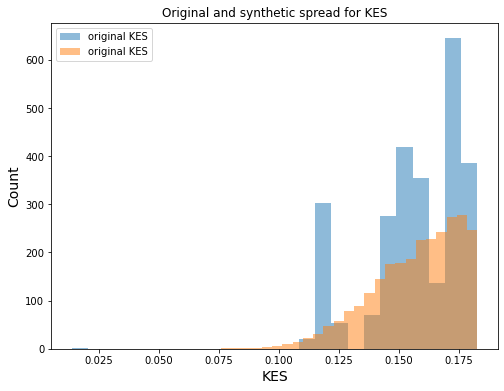

In [44]:
plt.figure(figsize=(8,6))
plt.hist(KES_original, bins=25, alpha=0.5, label="original KES")
plt.hist(KES_synthetic, bins=25, alpha=0.5, label="original KES")
plt.xlabel("KES", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for KES")
plt.savefig("Gauss_KES.png")
plt.legend(loc='upper left')
plt.show()

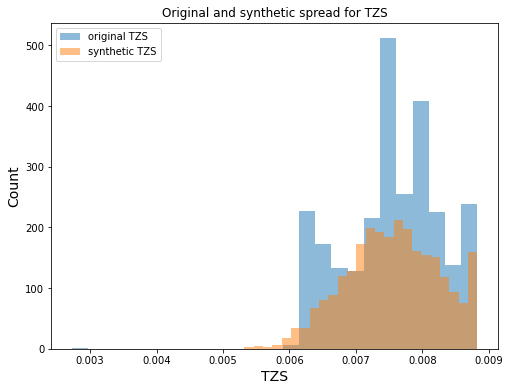

In [45]:
plt.figure(figsize=(8,6))
plt.hist(TZS_original, bins=25, alpha=0.5, label="original TZS")
plt.hist(TZS_synthetic, bins=25, alpha=0.5, label="synthetic TZS")
plt.xlabel("TZS", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for TZS")
plt.savefig("Gauss_TZS.png")
plt.legend(loc='upper left')
plt.show()

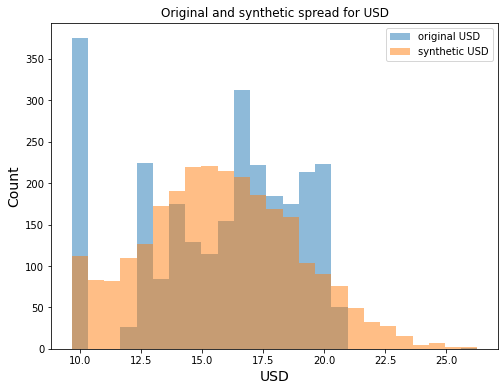

In [46]:
plt.figure(figsize=(8,6))
plt.hist(USD_original, bins=25, alpha=0.5, label="original USD")
plt.hist(USD_synthetic, bins=25, alpha=0.5, label="synthetic USD")
plt.xlabel("USD", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for USD")
plt.savefig("Gauss_USD.png")
plt.legend(loc='upper right')
plt.show()

#### Evaluation of the GaussianCopula model

In [47]:
from sdv.evaluation import evaluate

In [48]:
evaluate(new_data, data, aggregate=False)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,BNLikelihood,BayesianNetwork Likelihood,NaN,NaN,0.0,1.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
1,BNLogLikelihood,BayesianNetwork Log Likelihood,NaN,NaN,-inf,0.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
2,LogisticDetection,LogisticRegression Detection,0.849457,8.494575e-01,0.0,1.0,MAXIMIZE,None
3,SVCDetection,SVC Detection,0.087439,8.743874e-02,0.0,1.0,MAXIMIZE,None
4,BinaryDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
5,BinaryAdaBoostClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
6,BinaryLogisticRegression,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
7,BinaryMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
8,MulticlassDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
9,MulticlassMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...


In [49]:
evaluate(new_data, data, metrics=['KSComplement'])

0.9108148704468645

CTGAN
--------------

The `sdv.tabular.CTGAN` model is based on the GAN-based Deep Learning
data synthesizer which was presented at the NeurIPS 2020 conference by
the paper titled [Modeling Tabular data using Conditional
GAN](https://arxiv.org/abs/1907.00503).

Let\'s now discover how to learn a dataset and later on generate
synthetic data with the same format and statistical properties by using
the `CTGAN` class from SDV.

#### Creating an instance of the model, fit and sample data

In [50]:
from sdv.tabular import CTGAN

model = CTGAN()
model.fit(data)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different 

In [51]:
synthetic_data = model.sample(num_rows= len(data))

#### Correlations

In [52]:
cormat_CTGAN = synthetic_data.corr()
round(cormat_CTGAN,4)

,ETB,EUR,GBP,KES,TZS,USD
ETB,1.0000,-0.2425,-0.1946,-0.2121,0.0014,-0.2386
EUR,-0.2425,1.0000,0.4744,0.5003,0.4838,0.5083
GBP,-0.1946,0.4744,1.0000,0.5134,0.4587,0.4699
KES,-0.2121,0.5003,0.5134,1.0000,0.5013,0.5365
TZS,0.0014,0.4838,0.4587,0.5013,1.0000,0.4602
USD,-0.2386,0.5083,0.4699,0.5365,0.4602,1.0000


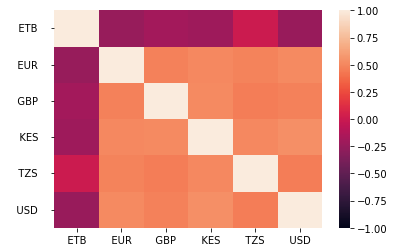

In [53]:
sns.heatmap(cormat_CTGAN, vmin = -1.0, vmax=1.0);

In [54]:
ETB_syn = synthetic_data.iloc[:,[0]]
EUR_syn = synthetic_data.iloc[:,[1]]
GBP_syn = synthetic_data.iloc[:,[2]]
KES_syn = synthetic_data.iloc[:,[3]]
TZS_syn = synthetic_data.iloc[:,[4]]
USD_syn = synthetic_data.iloc[:,[5]]

#### Distribution of currency returns

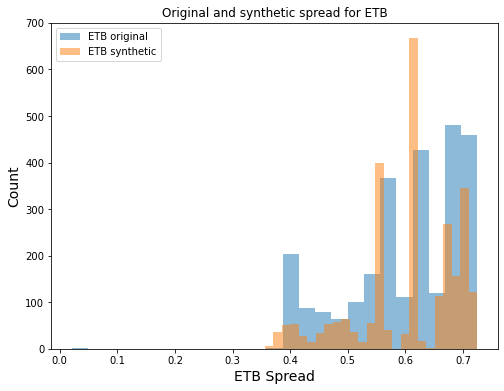

In [55]:
plt.figure(figsize=(8,6))
plt.hist(ETB_original, bins=25, alpha=0.5, label="ETB original")
plt.hist(ETB_syn, bins=25, alpha=0.5, label="ETB synthetic")
plt.xlabel("ETB Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for ETB")
plt.legend(loc='upper left')
plt.show()

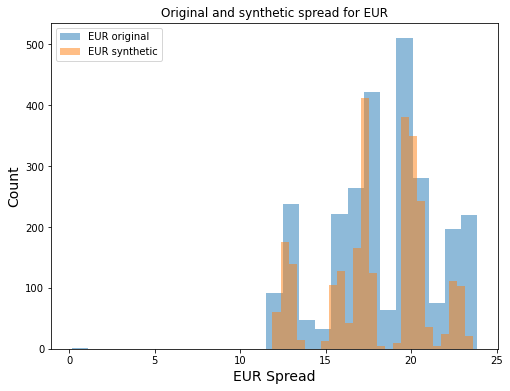

In [56]:
plt.figure(figsize=(8,6))
plt.hist(EUR_original, bins=25, alpha=0.5, label="EUR original")
plt.hist(EUR_syn, bins=25, alpha=0.5, label="EUR synthetic")
plt.xlabel("EUR Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for EUR")
plt.legend(loc='upper left')
plt.show()

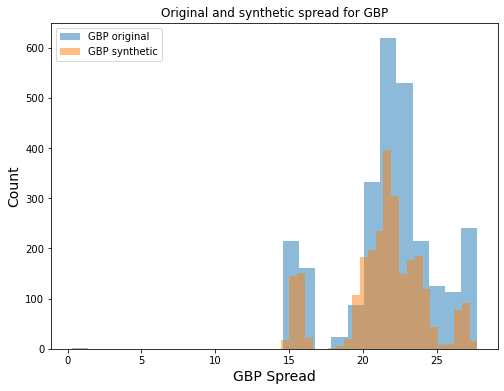

In [57]:
plt.figure(figsize=(8,6))
plt.hist(GBP_original, bins=25, alpha=0.5, label="GBP original")
plt.hist(GBP_syn, bins=25, alpha=0.5, label="GBP synthetic")
plt.xlabel("GBP Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for GBP")
plt.legend(loc='upper left')
plt.show()

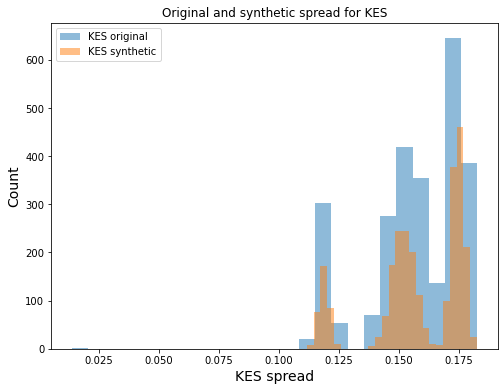

In [58]:
plt.figure(figsize=(8,6))
plt.hist(KES_original, bins=25, alpha=0.5, label="KES original")
plt.hist(KES_syn, bins=25, alpha=0.5, label="KES synthetic")
plt.xlabel("KES spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for KES")
plt.legend(loc='upper left')
plt.show()

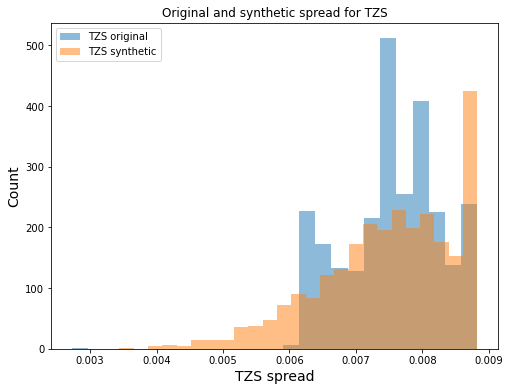

In [59]:
plt.figure(figsize=(8,6))
plt.hist(TZS_original, bins=25, alpha=0.5, label="TZS original")
plt.hist(TZS_syn, bins=25, alpha=0.5, label="TZS synthetic")
plt.xlabel("TZS spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for TZS")
plt.legend(loc='upper left')
plt.show()

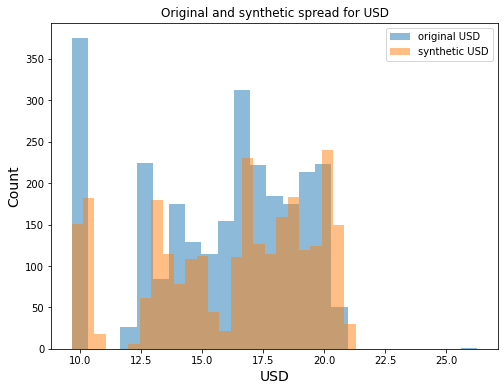

In [60]:
plt.figure(figsize=(8,6))
plt.hist(USD_original, bins=25, alpha=0.5, label="original USD")
plt.hist(USD_syn, bins=25, alpha=0.5, label="synthetic USD")
plt.xlabel("USD", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for USD")
plt.savefig("CTGAN_USD.png")
plt.legend(loc='upper right')
plt.show()

#### Evaluation of CTGAN model

In [18]:
evaluate(synthetic_data, data, aggregate=False)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,BNLikelihood,BayesianNetwork Likelihood,NaN,NaN,0.0,1.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
1,BNLogLikelihood,BayesianNetwork Log Likelihood,NaN,NaN,-inf,0.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
2,LogisticDetection,LogisticRegression Detection,0.802888,8.028885e-01,0.0,1.0,MAXIMIZE,None
3,SVCDetection,SVC Detection,0.087249,8.724923e-02,0.0,1.0,MAXIMIZE,None
4,BinaryDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
5,BinaryAdaBoostClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
6,BinaryLogisticRegression,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
7,BinaryMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
8,MulticlassDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
9,MulticlassMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...


TVAE
--------------

The `sdv.tabular.TVAE` model is based on the VAE-based Deep Learning
data synthesizer which was presented at the NeurIPS 2020 conference by
the paper titled [Modeling Tabular data using Conditional
GAN](https://arxiv.org/abs/1907.00503).

Let\'s now discover how to learn a dataset and later on generate
synthetic data with the same format and statistical properties by using
the `TVAE` class from SDV.

#### Creating an instance of the model, fit and sample data

In [61]:
from sdv.tabular import TVAE

model = TVAE()
model.fit(data)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different 

In [87]:
synthetic_dataset = model.sample(num_rows= len(data), output_file_path = "TVAE.csv")

### Correlations

In [63]:
cormat_TVAE = synthetic_dataset.corr()
round(cormat_TVAE,4)

,ETB,EUR,GBP,KES,TZS,USD
ETB,1.0000,-0.4766,-0.3435,-0.3311,-0.4099,-0.4117
EUR,-0.4766,1.0000,0.8267,0.8734,0.7713,0.8412
GBP,-0.3435,0.8267,1.0000,0.8262,0.7704,0.7950
KES,-0.3311,0.8734,0.8262,1.0000,0.7544,0.8572
TZS,-0.4099,0.7713,0.7704,0.7544,1.0000,0.6679
USD,-0.4117,0.8412,0.7950,0.8572,0.6679,1.0000


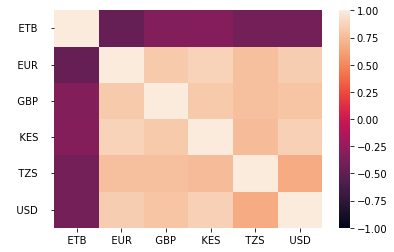

In [64]:
sns.heatmap(cormat_TVAE, vmin = -1.0, vmax=1.0);

In [65]:
ETB_synthetic_dataset = synthetic_dataset.iloc[:,[0]]
EUR_synthetic_dataset = synthetic_dataset.iloc[:,[1]]
GBP_synthetic_dataset = synthetic_dataset.iloc[:,[2]]
KES_synthetic_dataset = synthetic_dataset.iloc[:,[3]]
TZS_synthetic_dataset = synthetic_dataset.iloc[:,[4]]
USD_synthetic_dataset = synthetic_dataset.iloc[:,[5]]

#### Distribution of currency returns

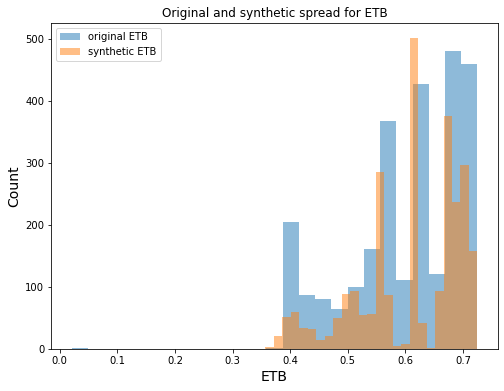

In [66]:
plt.figure(figsize=(8,6))
plt.hist(ETB_original, bins=25, alpha=0.5, label="original ETB")
plt.hist(ETB_synthetic_dataset, bins=25, alpha=0.5, label="synthetic ETB")
plt.xlabel("ETB", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for ETB")
plt.savefig("TVAE_ETB.png")
plt.legend(loc='upper left')
plt.show()

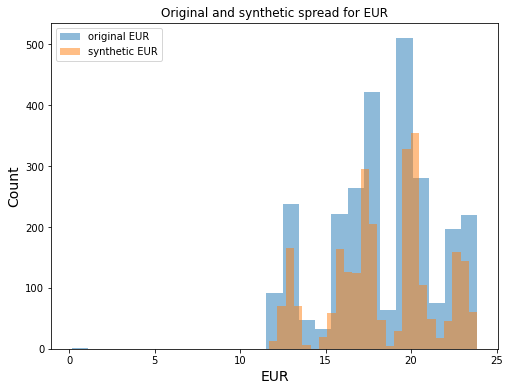

In [67]:
plt.figure(figsize=(8,6))
plt.hist(EUR_original, bins=25, alpha=0.5, label="original EUR")
plt.hist(EUR_synthetic_dataset, bins=25, alpha=0.5, label="synthetic EUR")
plt.xlabel("EUR", size=14)
plt.ylabel("Count", size=14)
plt.savefig("TVAE_EUR.png")
plt.title("Original and synthetic spread for EUR")
plt.legend(loc='upper left')
plt.show()

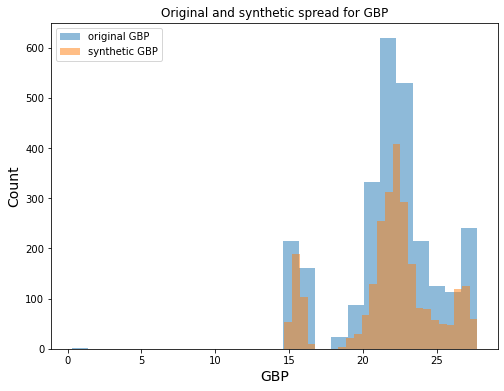

In [68]:
plt.figure(figsize=(8,6))
plt.hist(GBP_original, bins=25, alpha=0.5, label="original GBP")
plt.hist(GBP_synthetic_dataset, bins=25, alpha=0.5, label="synthetic GBP")
plt.xlabel("GBP", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for GBP")
plt.savefig("TVAE_GBP.png")
plt.legend(loc='upper left')
plt.show()

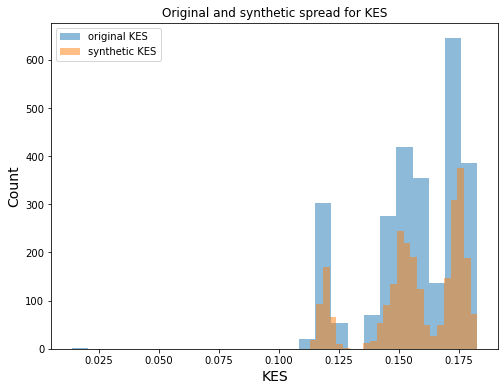

In [69]:
plt.figure(figsize=(8,6))
plt.hist(KES_original, bins=25, alpha=0.5, label="original KES")
plt.hist(KES_synthetic_dataset, bins=25, alpha=0.5, label="synthetic KES")
plt.xlabel("KES", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for KES")
plt.savefig("TVAE_KES.png")
plt.legend(loc='upper left')
plt.show()

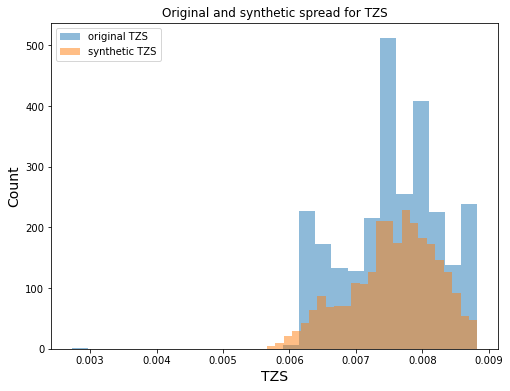

In [70]:
plt.figure(figsize=(8,6))
plt.hist(TZS_original, bins=25, alpha=0.5, label="original TZS")
plt.hist(TZS_synthetic_dataset, bins=25, alpha=0.5, label="synthetic TZS")
plt.xlabel("TZS", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for TZS")
plt.savefig("TVAE_TZS.png")
plt.legend(loc='upper left')
plt.show()

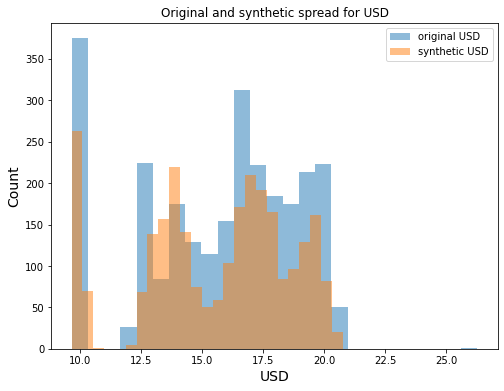

In [71]:
plt.figure(figsize=(8,6))
plt.hist(USD_original, bins=25, alpha=0.5, label="original USD")
plt.hist(USD_synthetic_dataset, bins=25, alpha=0.5, label="synthetic USD")
plt.xlabel("USD", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for USD")
plt.savefig("TVAE_USD.png")
plt.legend(loc='upper right')
plt.show()

#### Evaluation of TVAE model

In [72]:
evaluate(synthetic_dataset, data, metrics=['KSComplement'])

0.9446113405933158

In [73]:
evaluate(synthetic_dataset, data, aggregate=False)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,BNLikelihood,BayesianNetwork Likelihood,NaN,NaN,0.0,1.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
1,BNLogLikelihood,BayesianNetwork Log Likelihood,NaN,NaN,-inf,0.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
2,LogisticDetection,LogisticRegression Detection,0.892630,8.926296e-01,0.0,1.0,MAXIMIZE,None
3,SVCDetection,SVC Detection,0.574762,5.747623e-01,0.0,1.0,MAXIMIZE,None
4,BinaryDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
5,BinaryAdaBoostClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
6,BinaryLogisticRegression,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
7,BinaryMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
8,MulticlassDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
9,MulticlassMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...


CopulaGAN
------------------

The `sdv.tabular.CopulaGAN` model is a variation of the
[ctgan](ctgan.ipynb) which takes advantage of the CDF
based transformation that the GaussianCopulas apply to make the
underlying CTGAN model task of learning the data easier.

Let\'s now discover how to learn a dataset and later on generate
synthetic data with the same format and statistical properties by using
the `CopulaGAN` class from SDV.

#### Creating an instance of the model, fit and sample data

In [74]:
from sdv.tabular import CopulaGAN

model = CopulaGAN()
model.fit(data)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/Users/apple

In [75]:
artificial_data = model.sample(num_rows= len(data))

### Corellations

In [76]:
cormat_CopulaGAN = artificial_data.corr()
round(cormat_CopulaGAN,4)

,ETB,EUR,GBP,KES,TZS,USD
ETB,1.0000,-0.2743,-0.2510,-0.1953,-0.2378,-0.2693
EUR,-0.2743,1.0000,0.6698,0.6531,0.6024,0.6500
GBP,-0.2510,0.6698,1.0000,0.6786,0.6163,0.6605
KES,-0.1953,0.6531,0.6786,1.0000,0.6116,0.6657
TZS,-0.2378,0.6024,0.6163,0.6116,1.0000,0.6049
USD,-0.2693,0.6500,0.6605,0.6657,0.6049,1.0000


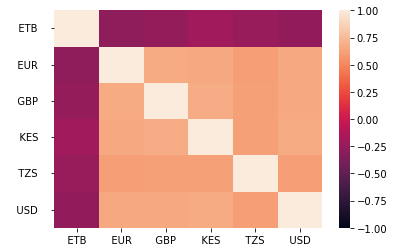

In [77]:
sns.heatmap(cormat_CopulaGAN, vmin = -1.0, vmax=1.0);

In [78]:
ETB_artificial_data = artificial_data.iloc[:,[0]]
EUR_artificial_data = artificial_data.iloc[:,[1]]
GBP_artificial_data = artificial_data.iloc[:,[2]]
KES_artificial_data = artificial_data.iloc[:,[3]]
TZS_artificial_data = artificial_data.iloc[:,[4]]
USD_artificial_data = artificial_data.iloc[:,[5]]

#### Distribution of currency returns

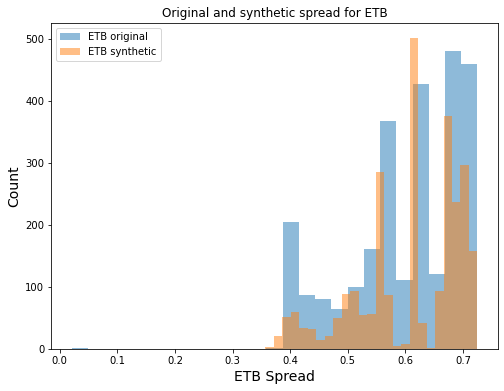

In [79]:
plt.figure(figsize=(8,6))
plt.hist(ETB_original, bins=25, alpha=0.5, label="ETB original")
plt.hist(ETB_synthetic_dataset, bins=25, alpha=0.5, label="ETB synthetic")
plt.xlabel("ETB Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for ETB")
plt.legend(loc='upper left')
#plt.savefig("overlapping_histograms_ETB.png")
plt.show()

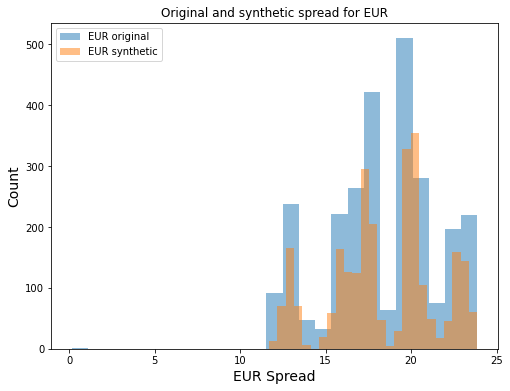

In [80]:
plt.figure(figsize=(8,6))
plt.hist(EUR_original, bins=25, alpha=0.5, label="EUR original")
plt.hist(EUR_synthetic_dataset, bins=25, alpha=0.5, label="EUR synthetic")
plt.xlabel("EUR Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for EUR")
plt.legend(loc='upper left')
plt.show()

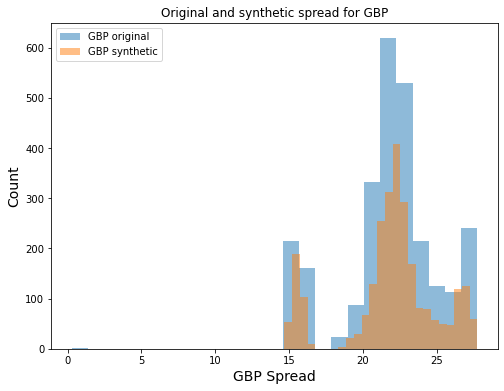

In [81]:
plt.figure(figsize=(8,6))
plt.hist(GBP_original, bins=25, alpha=0.5, label="GBP original")
plt.hist(GBP_synthetic_dataset, bins=25, alpha=0.5, label="GBP synthetic")
plt.xlabel("GBP Spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for GBP")
plt.legend(loc='upper left')
plt.show()

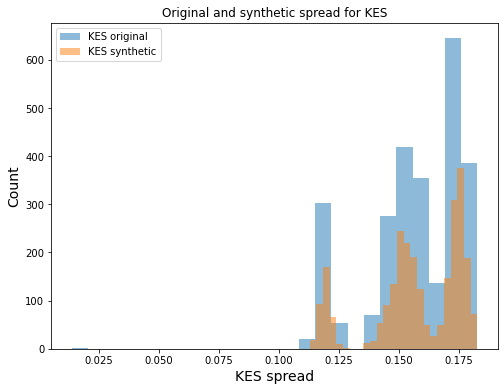

In [82]:
plt.figure(figsize=(8,6))
plt.hist(KES_original, bins=25, alpha=0.5, label="KES original")
plt.hist(KES_synthetic_dataset, bins=25, alpha=0.5, label="KES synthetic")
plt.xlabel("KES spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for KES")
plt.legend(loc='upper left')
plt.show()

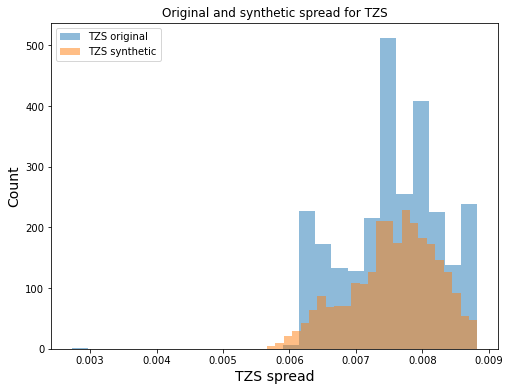

In [83]:
plt.figure(figsize=(8,6))
plt.hist(TZS_original, bins=25, alpha=0.5, label="TZS original")
plt.hist(TZS_synthetic_dataset, bins=25, alpha=0.5, label="TZS synthetic")
plt.xlabel("TZS spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for TZS")
plt.legend(loc='upper left')
plt.show()

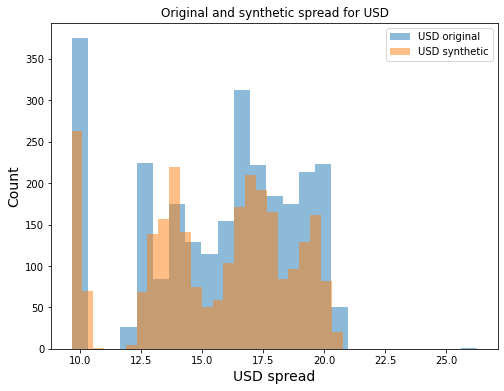

In [84]:
plt.figure(figsize=(8,6))
plt.hist(USD_original, bins=25, alpha=0.5, label="USD original")
plt.hist(USD_synthetic_dataset, bins=25, alpha=0.5, label="USD synthetic")
plt.xlabel("USD spread", size=14)
plt.ylabel("Count", size=14)
plt.title("Original and synthetic spread for USD")
plt.legend(loc='upper right')
plt.show()

#### Evaluation of CopulaGAN model

In [85]:
evaluate(artificial_data, data, metrics=['KSComplement'])

0.9391663537363875

In [86]:
evaluate(artificial_data, data, aggregate = False)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,BNLikelihood,BayesianNetwork Likelihood,NaN,NaN,0.0,1.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
1,BNLogLikelihood,BayesianNetwork Log Likelihood,NaN,NaN,-inf,0.0,MAXIMIZE,"numpy.ndarray size changed, may indicate binar..."
2,LogisticDetection,LogisticRegression Detection,0.989882,9.898822e-01,0.0,1.0,MAXIMIZE,None
3,SVCDetection,SVC Detection,0.119417,1.194166e-01,0.0,1.0,MAXIMIZE,None
4,BinaryDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
5,BinaryAdaBoostClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
6,BinaryLogisticRegression,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
7,BinaryMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
8,MulticlassDecisionTreeClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...
9,MulticlassMLPClassifier,None,NaN,NaN,0.0,1.0,MAXIMIZE,`target` must be passed either directly or ins...


#### Model Comparison (KS Statistic) for a particular instance of the synthesis

| Model               | KSComplement Score          | Comments                              |
| :-------------------|:---------------------------:|--------------------------------------:|
| GaussianCopula      | 0.9006133433471022          | Registered the least score            |
| CTGAN               | 0.9110652146701715          | Outperformed only GaussianCopula      |
| CopulaGAN           | 0.9143196895731630          | Outperformed CTGAN and GaussianCopula |
| TVAE                | 0.9499311553385906          | Outperformed all other models         |

==========  [AI in Finance Research](https://aiinfinancegroup.github.io/) ==== @ Makerere University, Kampala Uganda ===== 2022 ======